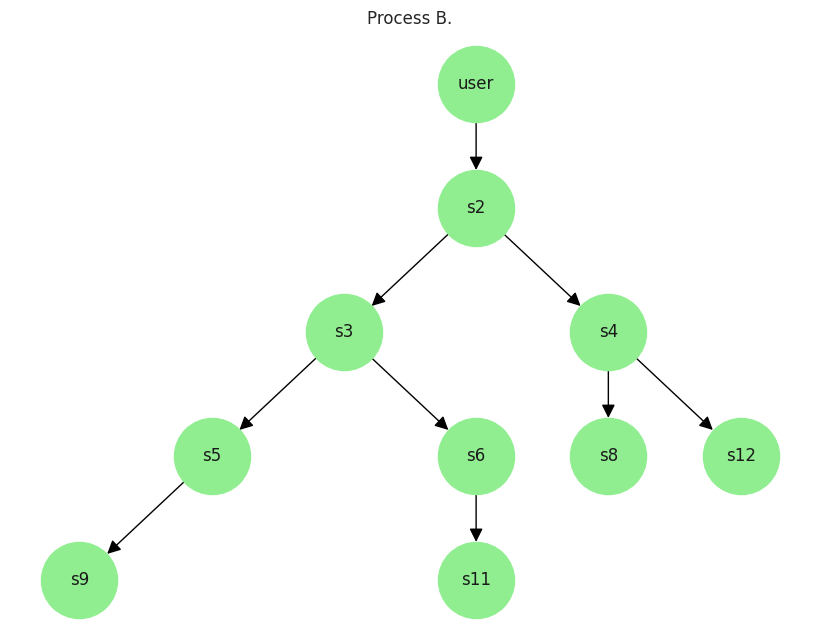

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G3 = nx.DiGraph()

# Add nodes s2 to s11
nodes3 = ['s{}'.format(i) for i in range(2, 12)]
G3.add_nodes_from(nodes3)

# Define edges based on a descending structure with depth <= 3
edges3 = [ ('user', 's2'),
    ('s2', 's3'), ('s2', 's4'), ('s3', 's5'), ('s3', 's6'),
    ('s4', 's12'), ('s4', 's8'), ('s5', 's9'),
    ('s6', 's11')
]

G3.add_edges_from(edges3)

# Define positions for the nodes to arrange them in a tree-like structure
pos3 = {
    'user' : (0,1),
    's2': (0, 0),
    's3': (-1, -1),
    's4': (1, -1),
    's5': (-2, -2),
    's6': (0, -2),
    's12': (2, -2),
    's8': (1, -2),
    's9': (-3, -3),
    's11': (0, -3),
    's7': (0,0),
    's10': (0,0)
}

# Draw the second graph
plt.figure(figsize=(8, 6))
nodes_to_remove = ['s7', 's10']
G3.remove_nodes_from(nodes_to_remove)

nx.draw(G3, pos=pos3, with_labels=True, node_color='lightgreen', edge_color='black', node_size=3000, font_size=12, arrowsize=20)
plt.title('Process B.')
plt.show()


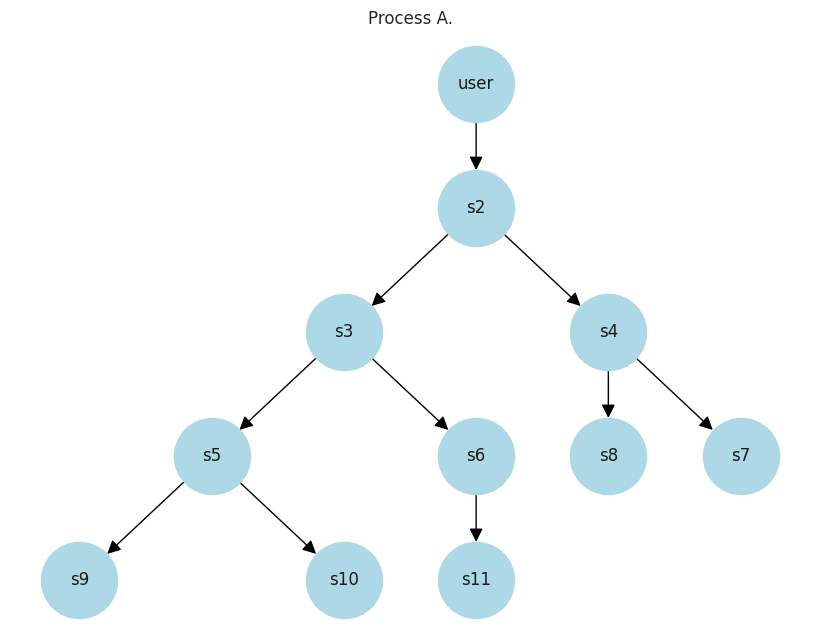

In [6]:
# Create a directed graph
G2 = nx.DiGraph()

# Add nodes s2 to s11
nodes2 = ['s{}'.format(i) for i in range(2, 12)]
G2.add_nodes_from(nodes2)

# Define edges based on a descending structure with depth <= 3
edges2 = [ ('user', 's2'),
    ('s2', 's3'), ('s2', 's4'), ('s3', 's5'), ('s3', 's6'),
    ('s4', 's7'), ('s4', 's8'), ('s5', 's9'), ('s5', 's10'),
    ('s6', 's11')
]

G2.add_edges_from(edges2)

# Define positions for the nodes to arrange them in a tree-like structure
pos2 = {
    'user' : (0,1),
    's2': (0, 0),
    's3': (-1, -1),
    's4': (1, -1),
    's5': (-2, -2),
    's6': (0, -2),
    's7': (2, -2),
    's8': (1, -2),
    's9': (-3, -3),
    's10': (-1, -3),
    's11': (0, -3)
}

# Draw the second graph
plt.figure(figsize=(8, 6))
nx.draw(G2, pos=pos2, with_labels=True, node_color='lightblue', edge_color='black', node_size=3000, font_size=12, arrowsize=20)
plt.title('Process A.')
plt.show()


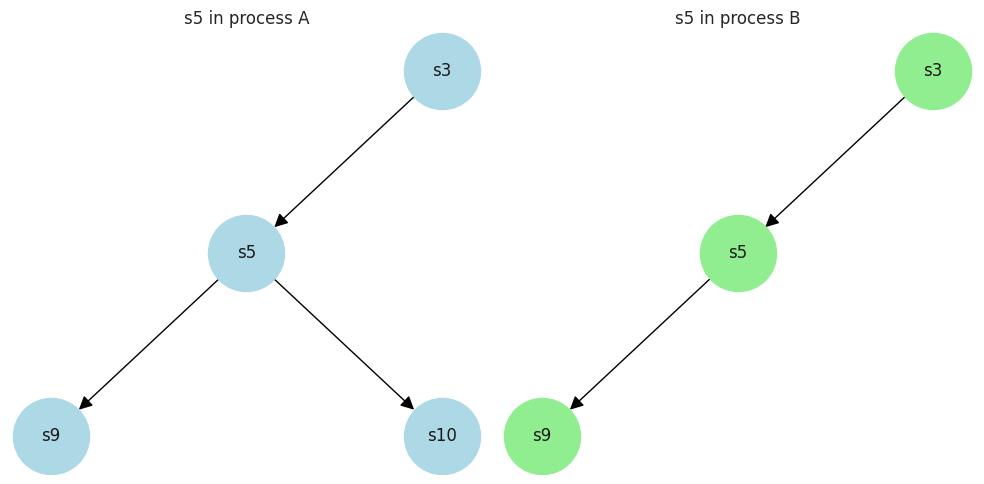

In [7]:
subtree_nodes = nx.descendants(G3, 's3') | {'s3'}
subtree_nodes.discard('s6')
subtree_nodes.discard('s11')


G3_s5 = G3.subgraph(subtree_nodes)


# Define positions for the subtree nodes
pos_s5 = {node: pos3[node] for node in subtree_nodes}

subtree_nodes2 = nx.descendants(G2, 's3') | {'s3'}
subtree_nodes2.discard('s6')
subtree_nodes2.discard('s11')

G2_s5 = G2.subgraph(subtree_nodes2)

# Define positions for the subtree nodes
pos2_s5 = {node: pos2[node] for node in subtree_nodes2}


# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Draw the subtree centered on s5 in the first subplot

# Draw the entire graph G3 in the second subplot
ax1.set_title('s5 in process A')
nx.draw(G2_s5, pos=pos2_s5, with_labels=True, node_color='lightblue', edge_color='black', node_size=3000, font_size=12, arrowsize=20, ax=ax1)

ax2.set_title('s5 in process B')
nx.draw(G3_s5, pos=pos_s5, with_labels=True, node_color='lightgreen', edge_color='black', node_size=3000, font_size=12, arrowsize=20, ax=ax2)


plt.tight_layout()
plt.show()

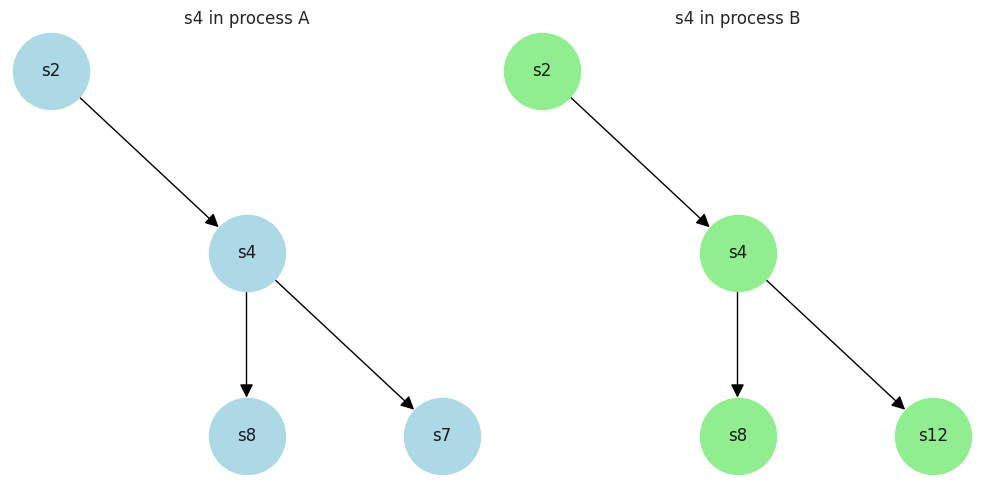

In [8]:
subtree_nodes = nx.descendants(G3, 's2') | {'s2'}
subtree_nodes.discard('s3')
subtree_nodes.discard('s9')
subtree_nodes.discard('s3')
subtree_nodes.discard('s5')

subtree_nodes.discard('s6')
subtree_nodes.discard('s11')


G3_s5 = G3.subgraph(subtree_nodes)


# Define positions for the subtree nodes
pos_s5 = {node: pos3[node] for node in subtree_nodes}

subtree_nodes2 = nx.descendants(G2, 's2') | {'s2'}

subtree_nodes2.discard('s3')
subtree_nodes2.discard('s5')
subtree_nodes2.discard('s9')
subtree_nodes2.discard('s10')
subtree_nodes2.discard('s6')
subtree_nodes2.discard('s11')


G2_s5 = G2.subgraph(subtree_nodes2)

# Define positions for the subtree nodes
pos2_s5 = {node: pos2[node] for node in subtree_nodes2}


# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Draw the subtree centered on s5 in the first subplot

# Draw the entire graph G3 in the second subplot
ax1.set_title('s4 in process A')
nx.draw(G2_s5, pos=pos2_s5, with_labels=True, node_color='lightblue', edge_color='black', node_size=3000, font_size=12, arrowsize=20, ax=ax1)

ax2.set_title('s4 in process B')
nx.draw(G3_s5, pos=pos_s5, with_labels=True, node_color='lightgreen', edge_color='black', node_size=3000, font_size=12, arrowsize=20, ax=ax2)


plt.tight_layout()
plt.show()

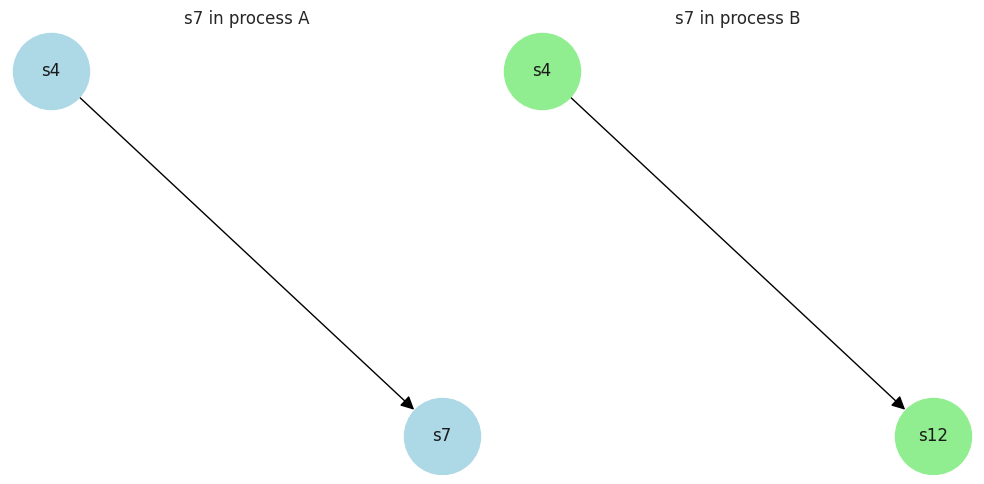

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G2 and pos2 are already defined
# Define the subtree nodes for G2 starting from 's4'
subtree_nodes2 = nx.descendants(G2, 's4') | {'s4'}
subtree_nodes2.discard('s8')


# Create subgraph for the subtree nodes
G2_s4 = G2.subgraph(subtree_nodes2)

# Define positions for the subtree nodes
pos2_s4 = {node: pos2[node] for node in subtree_nodes2 if node in pos2}

# Check for any missing nodes in pos2
missing_nodes = subtree_nodes2 - pos2_s4.keys()
if missing_nodes:
    raise KeyError(f"Nodes {missing_nodes} have no position.")



subtree_nodes3 = nx.descendants(G3, 's4') | {'s4'}
subtree_nodes3.discard('s8')


# Create subgraph for the subtree nodes
G3_s4 = G3.subgraph(subtree_nodes3)

# Define positions for the subtree nodes
pos3_s4 = {node: pos3[node] for node in subtree_nodes3 if node in pos3}

# Check for any missing nodes in pos2
missing_nodes = subtree_nodes3 - pos2_s4.keys()
missing_nodes = subtree_nodes3 - pos3_s4.keys()
if 's12' in missing_nodes:
    pos3_s4['s12'] = (2, -2)
    missing_nodes.remove('s12')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Draw the subtree centered on s5 in the first subplot

# Draw the entire graph G3 in the second subplot
ax1.set_title('s7 in process A')
nx.draw(G2_s4, pos=pos2_s4, with_labels=True, node_color='lightblue', edge_color='black', node_size=3000, font_size=12, arrowsize=20, ax=ax1)


ax2.set_title('s7 in process B')
nx.draw(G3_s4, pos=pos3_s4, with_labels=True, node_color='lightgreen', edge_color='black', node_size=3000, font_size=12, arrowsize=20, ax=ax2)


plt.tight_layout()
plt.show()